### 使用Python导入数据

In [2]:
import numpy as np
import operator

In [3]:
def createDataSet():
    group = np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group,labels

In [4]:
group,labels = createDataSet()
print(group)
print(labels)

[[1.  1.1]
 [1.  1. ]
 [0.  0. ]
 [0.  0.1]]
['A', 'A', 'B', 'B']


### k-近邻算法
#### 对未知类别属性的数据集中的每个点依次执行以下操作：
1. 计算已知类别数据集中的点与当前点之间的距离；
2. 按照距离递增次序排序；
3. 选取与当前点距离最小的k个点；
4. 确定前k个点所在类别的出现频率；
5. 返回前k个点出现频率最高的类别作为当前点的预测分类

In [5]:
# inX - 用于分类的输入向量
def classify0(inX, dataSet, labels, k):
    #numpy函数shape[0]返回dataSet的行数
    dataSetSize = dataSet.shape[0]
    #在列向量方向上重复inX共1次(横向)，行向量方向上重复inX共dataSetSize次(纵向)
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    #二维特征相减后平方
    sqDiffMat = diffMat**2
    #sum()所有元素相加，sum(0)列相加，sum(1)行相加
    sqDistances = sqDiffMat.sum(axis=1)
    #开方，计算出距离
    distances = sqDistances**0.5
    #返回distances中元素从小到大排序后的索引值
    sortedDistIndices = distances.argsort()
    #定一个记录类别次数的字典
    classCount = {}
    for i in range(k):
        #取出前k个元素的类别
        voteIlabel = labels[sortedDistIndices[i]]
        #dict.get(key,default=None),字典的get()方法,返回指定键的值,如果值不在字典中返回默认值。
        #计算类别次数
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    #key=operator.itemgetter(1)根据字典的值进行排序
    #key=operator.itemgetter(0)根据字典的键进行排序
    #reverse降序排序字典
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    #返回次数最多的类别,即所要分类的类别
    return sortedClassCount[0][0]

## 使用k-近邻算法改进约会网站的配对效果

### 将文本记录转换到Numpy

In [6]:
def file2matrix(filename):
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)
    #返回的NumPy矩阵 numberOfLines行,3列
    returnMat = np.zeros((numberOfLines,3))
    #返回的分类标签向量
    classLabelVector = []
    #行的索引值
    index = 0
    for line in arrayOLines:
        #s.strip(rm)，当rm空时,默认删除空白符(包括'\n','\r','\t',' ')
        line = line.strip()
        listFromLine = line.split('\t')
        #将数据前三列提取出来,存放到returnMat的矩阵中
        returnMat[index,:] = listFromLine[0:3]
        #根据文本中标记的喜欢的程度进行分类,1代表不喜欢,2代表魅力一般,3代表极具魅力
        if listFromLine[-1] == 'didntLike':
            classLabelVector.append(1)
        elif listFromLine[-1] == 'smallDoses':
            classLabelVector.append(2)
        elif listFromLine[-1] == 'largeDoses':
            classLabelVector.append(3)
        index += 1
    return returnMat, classLabelVector

In [7]:
datingDataMat,datingLabels = file2matrix('./datingTestSet.txt')
datingDataMat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [8]:
datingLabels[0:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

### 使用Matplotlib创建散点图

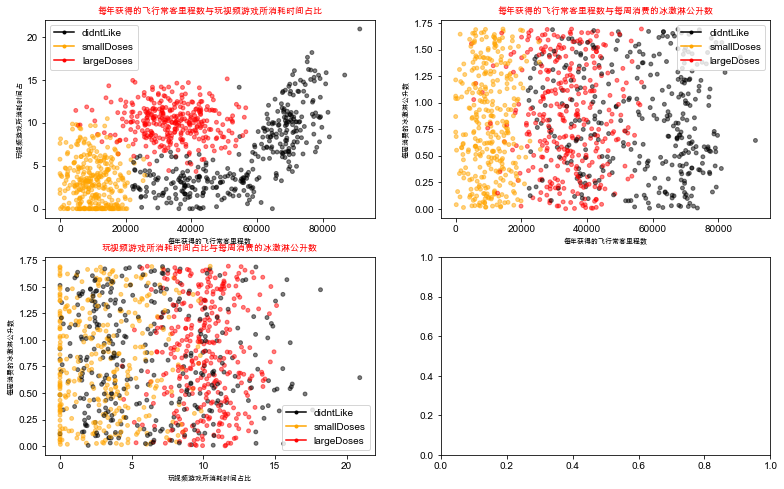

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
def showdatas(datingDataMat, datingLabels):

    #将fig画布分隔成1行1列,不共享x轴和y轴,fig画布的大小为(13,8)
    #当nrow=2,nclos=2时,代表fig画布被分为四个区域,axs[0][0]表示第一行第一个区域
    fig, axs = plt.subplots(nrows=2, ncols=2,sharex=False, sharey=False, figsize=(13,8))

    numberOfLabels = len(datingLabels)
    LabelsColors = []
    for i in datingLabels:
        if i == 1:
            LabelsColors.append('black')
        if i == 2:
            LabelsColors.append('orange')
        if i == 3:
            LabelsColors.append('red')
    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第二列(玩游戏)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][0].scatter(x=datingDataMat[:,0], y=datingDataMat[:,1], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs0_title_text = axs[0][0].set_title(u'每年获得的飞行常客里程数与玩视频游戏所消耗时间占比')
    axs0_xlabel_text = axs[0][0].set_xlabel(u'每年获得的飞行常客里程数')
    axs0_ylabel_text = axs[0][0].set_ylabel(u'玩视频游戏所消耗时间占')
    plt.setp(axs0_title_text, size=9, weight='bold', color='red')
    plt.setp(axs0_xlabel_text, size=7, weight='bold', color='black')
    plt.setp(axs0_ylabel_text, size=7, weight='bold', color='black')

    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][1].scatter(x=datingDataMat[:,0], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs1_title_text = axs[0][1].set_title(u'每年获得的飞行常客里程数与每周消费的冰激淋公升数')
    axs1_xlabel_text = axs[0][1].set_xlabel(u'每年获得的飞行常客里程数')
    axs1_ylabel_text = axs[0][1].set_ylabel(u'每周消费的冰激淋公升数')
    plt.setp(axs1_title_text, size=9, weight='bold', color='red')
    plt.setp(axs1_xlabel_text, size=7, weight='bold', color='black')
    plt.setp(axs1_ylabel_text, size=7, weight='bold', color='black')

    #画出散点图,以datingDataMat矩阵的第二(玩游戏)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[1][0].scatter(x=datingDataMat[:,1], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs2_title_text = axs[1][0].set_title(u'玩视频游戏所消耗时间占比与每周消费的冰激淋公升数')
    axs2_xlabel_text = axs[1][0].set_xlabel(u'玩视频游戏所消耗时间占比')
    axs2_ylabel_text = axs[1][0].set_ylabel(u'每周消费的冰激淋公升数')
    plt.setp(axs2_title_text, size=9, weight='bold', color='red')
    plt.setp(axs2_xlabel_text, size=7, weight='bold', color='black')
    plt.setp(axs2_ylabel_text, size=7, weight='bold', color='black')
    #设置图例
    didntLike = mlines.Line2D([], [], color='black', marker='.',
                      markersize=6, label='didntLike')
    smallDoses = mlines.Line2D([], [], color='orange', marker='.',
                      markersize=6, label='smallDoses')
    largeDoses = mlines.Line2D([], [], color='red', marker='.',
                      markersize=6, label='largeDoses')
    #添加图例
    axs[0][0].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[0][1].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[1][0].legend(handles=[didntLike,smallDoses,largeDoses])
    #显示图片
    plt.show()
showdatas(datingDataMat,datingLabels)

### 归一化数值

In [20]:
def autoNorm(dataSet):
    #获得数据的最小值
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    #最大值和最小值的范围
    ranges = maxVals - minVals
    #shape(dataSet)返回dataSet的矩阵行列数
    normDataSet = np.zeros(np.shape(dataSet))
    #返回dataSet的行数
    m = dataSet.shape[0]
    #原始值减去最小值
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    #除以最大和最小值的差,得到归一化数据
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    #返回归一化数据结果,数据范围,最小值
    return normDataSet, ranges, minVals

In [11]:
normMat,ranges,minVals = autoNorm(datingDataMat)
normMat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [12]:
ranges

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [13]:
minVals

array([0.      , 0.      , 0.001156])

### 测试算法

In [14]:
def datingClassTest():
    #打开的文件名
    filename = "./datingTestSet.txt"
    #将返回的特征矩阵和分类向量分别存储到datingDataMat和datingLabels中
    datingDataMat, datingLabels = file2matrix(filename)
    #取所有数据的百分之十
    hoRatio = 0.10
    #数据归一化,返回归一化后的矩阵,数据范围,数据最小值
    normMat, ranges, minVals = autoNorm(datingDataMat)
    #获得normMat的行数
    m = normMat.shape[0]
    #百分之十的测试数据的个数
    numTestVecs = int(m * hoRatio)
    #分类错误计数
    errorCount = 0.0

    for i in range(numTestVecs):
        #前numTestVecs个数据作为测试集,后m-numTestVecs个数据作为训练集
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m,:],
            datingLabels[numTestVecs:m], 4)
        print("分类结果:%d\t真实类别:%d" % (classifierResult, datingLabels[i]))
        if classifierResult != datingLabels[i]:
            errorCount += 1.0
    print("错误率:%f%%" %(errorCount/float(numTestVecs)*100))

In [15]:
datingClassTest()

分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3

### 使用算法

In [16]:
def classifyPerson():
    #输出结果
    resultList = ['讨厌','有些喜欢','非常喜欢']
    #三维特征用户输入
    precentTats = float(input("玩视频游戏所耗时间百分比:"))
    ffMiles = float(input("每年获得的飞行常客里程数:"))
    iceCream = float(input("每周消费的冰激淋公升数:"))
    #打开的文件名
    filename = "datingTestSet.txt"
    #打开并处理数据
    datingDataMat, datingLabels = file2matrix(filename)
    #训练集归一化
    normMat, ranges, minVals = autoNorm(datingDataMat)
    #生成NumPy数组,测试集
    inArr = np.array([precentTats, ffMiles, iceCream])
    #测试集归一化
    norminArr = (inArr - minVals) / ranges
    #返回分类结果
    classifierResult = classify0(norminArr, normMat, datingLabels, 3)
    #打印结果
    print("你可能%s这个人" % (resultList[classifierResult-1]))

In [18]:
classifyPerson()

玩视频游戏所耗时间百分比:8
每年获得的飞行常客里程数:41000
每周消费的冰激淋公升数:0.95
你可能讨厌这个人


## 手写识别系统

### 将图像转换为向量

In [20]:
def img2vector(filename):
    #创建1x1024零向量
    returnVect = np.zeros((1, 1024))
    #打开文件
    fr = open(filename)
    #按行读取
    for i in range(32):
        #读一行数据
        lineStr = fr.readline()
        #每一行的前32个元素依次添加到returnVect中
        for j in range(32):
            returnVect[0, 32*i+j] = int(lineStr[j])
    #返回转换后的1x1024向量
    return returnVect

In [21]:
testVector = img2vector('./testDigits/0_13.txt')
testVector[0,0:31]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 使用k-近邻算法识别手写数字

In [22]:
from os import listdir
from sklearn.neighbors import KNeighborsClassifier as kNN

def handwritingClassTest():
    #测试集的Labels
    hwLabels = []
    #返回trainingDigits目录下的文件名
    trainingFileList = listdir('./trainingDigits')
    #返回文件夹下文件的个数
    m = len(trainingFileList)
    #初始化训练的Mat矩阵,测试集
    trainingMat = np.zeros((m, 1024))
    #从文件名中解析出训练集的类别
    for i in range(m):
        #获得文件的名字
        fileNameStr = trainingFileList[i]
        #获得分类的数字
        classNumber = int(fileNameStr.split('_')[0])
        #将获得的类别添加到hwLabels中
        hwLabels.append(classNumber)
        #将每一个文件的1x1024数据存储到trainingMat矩阵中
        trainingMat[i,:] = img2vector('./trainingDigits/%s' % (fileNameStr))
    #构建kNN分类器
    neigh = kNN(n_neighbors = 3, algorithm = 'auto')
    #拟合模型, trainingMat为测试矩阵,hwLabels为对应的标签
    neigh.fit(trainingMat, hwLabels)
    #返回testDigits目录下的文件列表
    testFileList = listdir('./testDigits')
    #错误检测计数
    errorCount = 0.0
    #测试数据的数量
    mTest = len(testFileList)
    #从文件中解析出测试集的类别并进行分类测试
    for i in range(mTest):
        #获得文件的名字
        fileNameStr = testFileList[i]
        #获得分类的数字
        classNumber = int(fileNameStr.split('_')[0])
        #获得测试集的1x1024向量,用于训练
        vectorUnderTest = img2vector('./testDigits/%s' % (fileNameStr))
        #获得预测结果
        # classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        classifierResult = neigh.predict(vectorUnderTest)
        print("分类返回结果为%d\t真实结果为%d" % (classifierResult, classNumber))
        if(classifierResult != classNumber):
            errorCount += 1.0
    print("总共错了%d个数据\n错误率为%f%%" % (errorCount, errorCount/mTest * 100))

In [23]:
handwritingClassTest()

分类返回结果为4	真实结果为4
分类返回结果为4	真实结果为4
分类返回结果为3	真实结果为3
分类返回结果为9	真实结果为9
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为9	真实结果为9
分类返回结果为7	真实结果为7
分类返回结果为7	真实结果为7
分类返回结果为0	真实结果为0
分类返回结果为3	真实结果为3
分类返回结果为2	真实结果为2
分类返回结果为2	真实结果为2
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为2	真实结果为2
分类返回结果为6	真实结果为6
分类返回结果为6	真实结果为6
分类返回结果为9	真实结果为9
分类返回结果为8	真实结果为8
分类返回结果为1	真实结果为8
分类返回结果为1	真实结果为1
分类返回结果为8	真实结果为8
分类返回结果为1	真实结果为1
分类返回结果为3	真实结果为8
分类返回结果为9	真实结果为9
分类返回结果为6	真实结果为6
分类返回结果为6	真实结果为6
分类返回结果为5	真实结果为5
分类返回结果为2	真实结果为2
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为2	真实结果为2
分类返回结果为2	真实结果为2
分类返回结果为9	真实结果为9
分类返回结果为3	真实结果为3
分类返回结果为0	真实结果为0
分类返回结果为7	真实结果为7
分类返回结果为7	真实结果为7
分类返回结果为0	真实结果为0
分类返回结果为9	真实结果为9
分类返回结果为9	真实结果为9
分类返回结果为0	真实结果为0
分类返回结果为3	真实结果为3
分类返回结果为4	真实结果为4
分类返回结果为4	真实结果为4
分类返回结果为4	真实结果为4
分类返回结果为3	真实结果为3
分类返回结果为4	真实结果为4
分类返回结果为3	真实结果为3
分类返回结果为1	真实结果为1
分类返回结果为9	真实结果为9
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为7	真实结果为7
分类返回结果为9	真实结果为9
分类返回结果为7	真实结果为7
分类返回结果为0	真实结果为0
分类返回结果为7	真实结果为7
分类返回结果为9	真实结果为9
分类返回结果为0	真实结果为0
分类返回结果为2

分类返回结果为5	真实结果为5
分类返回结果为2	真实结果为2
分类返回结果为6	真实结果为6
分类返回结果为6	真实结果为6
分类返回结果为8	真实结果为8
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为8	真实结果为8
分类返回结果为8	真实结果为8
分类返回结果为0	真实结果为0
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为0	真实结果为0
分类返回结果为8	真实结果为8
分类返回结果为1	真实结果为1
分类返回结果为8	真实结果为8
分类返回结果为8	真实结果为8
分类返回结果为1	真实结果为1
分类返回结果为6	真实结果为6
分类返回结果为6	真实结果为6
分类返回结果为2	真实结果为2
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为2	真实结果为2
分类返回结果为4	真实结果为4
分类返回结果为7	真实结果为7
分类返回结果为7	真实结果为7
分类返回结果为9	真实结果为9
分类返回结果为0	真实结果为0
分类返回结果为9	真实结果为9
分类返回结果为4	真实结果为4
分类返回结果为3	真实结果为3
分类返回结果为6	真实结果为6
分类返回结果为3	真实结果为3
分类返回结果为3	真实结果为3
分类返回结果为4	真实结果为4
分类返回结果为4	真实结果为4
分类返回结果为3	真实结果为3
分类返回结果为3	真实结果为3
分类返回结果为4	真实结果为4
分类返回结果为4	真实结果为4
分类返回结果为4	真实结果为4
分类返回结果为3	真实结果为3
分类返回结果为6	真实结果为6
分类返回结果为7	真实结果为7
分类返回结果为7	真实结果为7
分类返回结果为9	真实结果为9
分类返回结果为0	真实结果为0
分类返回结果为9	真实结果为9
分类返回结果为4	真实结果为4
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为2	真实结果为2
分类返回结果为2	真实结果为2
分类返回结果为1	真实结果为1
分类返回结果为8	真实结果为8
分类返回结果为8	真实结果为8
分类返回结果为1	真实结果为1
分类返回结果为6	真实结果为6
分类返回结果为6	真实结果为6
分类返回结果为1